In [1]:
import pandas as pd
import seaborn as sns

pd.options.display.max_rows = 9999
pd.options.display.max_columns = 999

In [2]:
requests_22 = pd.read_csv(
    "../data/raw/311_City_Service_Requests_in_2022.csv.gz",
    parse_dates=(
        [
            "RESOLUTIONDATE",
            "SERVICEDUEDATE",
            "SERVICEORDERDATE",
            "INSPECTIONDATE",
            "CREATED",
            "EDITED",
        ]
    ),
    low_memory=False,
)
requests_23 = pd.read_csv(
    "../data/raw/311_City_Service_Requests_in_2023.csv.gz",
    parse_dates=(
        [
            "RESOLUTIONDATE",
            "SERVICEDUEDATE",
            "SERVICEORDERDATE",
            "INSPECTIONDATE",
            "CREATED",
            "EDITED",
        ]
    ),
    low_memory=False,
)

requests_24 = pd.read_csv(
    "../data/raw/311_City_Service_Requests_in_2024.csv.gz",
    parse_dates=(
        [
            "RESOLUTIONDATE",
            "SERVICEDUEDATE",
            "SERVICEORDERDATE",
            "INSPECTIONDATE",
            "CREATED",
            "EDITED",
        ]
    ),
    low_memory=False,
)

In [3]:
requests_22.shape, requests_23.shape, requests_24.shape 

((385688, 36), (425225, 36), (422316, 39))

In [4]:
sum(requests_22.columns != requests_23.columns), sum(
    requests_22.dtypes != requests_23.dtypes
)

(np.int64(0), 0)

In [5]:
def cleanup(df):
    df.columns = [c.lower() for c in df.columns]
    df["resolutiondate_date"] = df.resolutiondate.dt.date
    df["serviceduedate_date"] = df.serviceduedate.dt.date
    df["serviceorderdate_date"] = df.serviceorderdate.dt.date
    df["inspectiondate_date"] = df.inspectiondate.dt.date
    df["created_date"] = df.created.dt.date
    df["edited_date"] = df.edited.dt.date
    return df

In [6]:
requests_22 = cleanup(requests_22)
requests_23 = cleanup(requests_23)
requests_24 = cleanup(requests_24)

In [7]:
requests_23.shape

(425225, 42)

In [8]:
requests_23.columns

Index(['x', 'y', 'objectid', 'servicecode', 'servicecodedescription',
       'servicetypecodedescription', 'organizationacronym', 'servicecallcount',
       'adddate', 'resolutiondate', 'serviceduedate', 'serviceorderdate',
       'inspectionflag', 'inspectiondate', 'inspectorname',
       'serviceorderstatus', 'status_code', 'servicerequestid', 'priority',
       'streetaddress', 'xcoord', 'ycoord', 'latitude', 'longitude', 'city',
       'state', 'zipcode', 'maraddressrepositoryid', 'ward', 'details',
       'gis_id', 'globalid', 'creator', 'created', 'editor', 'edited',
       'resolutiondate_date', 'serviceduedate_date', 'serviceorderdate_date',
       'inspectiondate_date', 'created_date', 'edited_date'],
      dtype='object')

<Axes: xlabel='resolutiondate_date'>

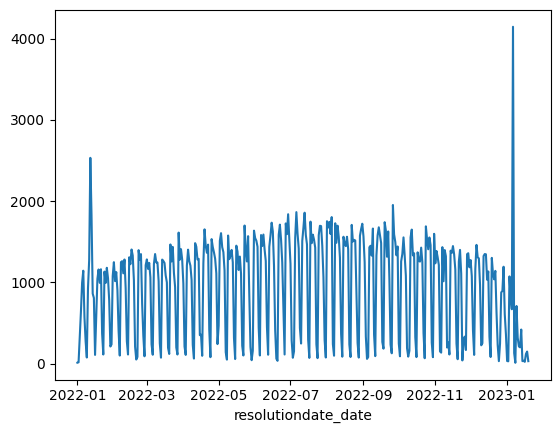

In [9]:
requests_22.resolutiondate_date.value_counts().sort_index().plot()

<Axes: xlabel='resolutiondate_date'>

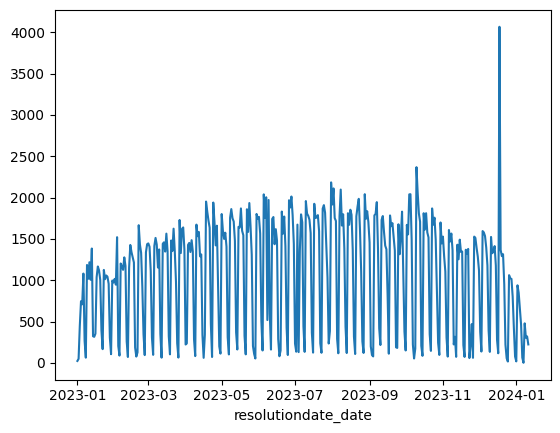

In [ ]:
breakrequests_23.resolutiondate_date.value_counts().sort_index().plot()

<Axes: xlabel='resolutiondate_date'>

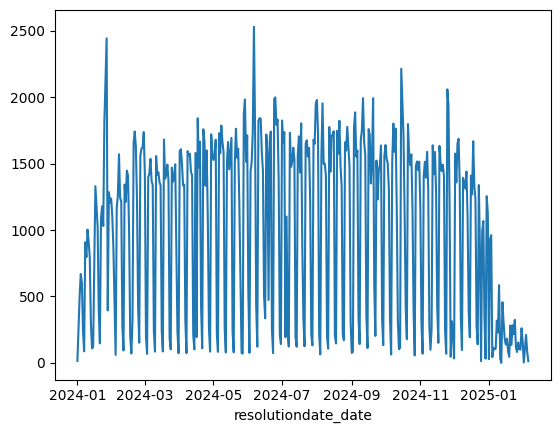

In [32]:
requests_24.resolutiondate_date.value_counts().sort_index().plot()

In [44]:
top_10_days_2024 = requests_24.resolutiondate_date.value_counts().head(10).index.to_list()

In [45]:
requests_24[requests_24.resolutiondate_date.isin(top_10_days_2024)].groupby(["organizationacronym", "resolutiondate_date"]).adddate.count()

organizationacronym  resolutiondate_date
DC Water             2024-05-29                1
                     2024-06-06                1
                     2024-06-25                2
                     2024-11-25                4
DDOT                 2024-01-26               89
                     2024-01-27               48
                     2024-05-29              303
                     2024-06-06              217
                     2024-06-24              439
                     2024-06-25              465
                     2024-09-11              235
                     2024-09-20              184
                     2024-10-15              313
                     2024-11-25              168
DGS                  2024-01-26                9
                     2024-05-29                9
                     2024-06-06                2
                     2024-06-24                6
                     2024-06-25                3
                     2024-09

In [26]:
requests_23.serviceorderstatus.value_counts()

serviceorderstatus
Closed                  391550
In-Progress              11503
Open                      8869
Closed (Duplicate)        8301
Canceled                  3701
Closed (Transferred)       922
Open (Duplicate)           362
In Progress                 17
Name: count, dtype: int64

In [28]:
requests_24.serviceorderstatus.value_counts(normalize=True) 

serviceorderstatus
Closed                  0.924971
Closed (Duplicate)      0.027460
Open                    0.020286
In-Progress             0.016620
Canceled                0.007260
Closed (Transferred)    0.002264
Open (Duplicate)        0.001111
In Progress             0.000024
Canceled (Duplicate)    0.000005
Name: proportion, dtype: float64

In [11]:
requests_23.groupby(["organizationacronym", "serviceorderstatus"]).globalid.count()

organizationacronym  serviceorderstatus  
CFSA                 Closed                      25
DC Water             Closed                     108
DDOT                 Canceled                   183
                     Closed                   72787
                     In-Progress              11503
                     Open                         1
DFHV                 Canceled                     1
                     Closed                      28
                     Open                        10
DGS                  Canceled                     1
                     Closed                     606
                     Closed (Duplicate)           8
                     Open                       114
                     Open (Duplicate)             1
DMV                  Canceled                    47
                     Closed                    6407
                     Open                         2
DOB                  Canceled                    29
                     C

In [21]:
requests_24.organizationacronym.value_counts() / len(requests_24)

organizationacronym
DPW         0.733950
DDOT        0.150676
DOH         0.040870
OUC         0.039951
DMV         0.014333
DOB         0.010978
DGS         0.004355
DOEE        0.002129
ORM         0.001634
DC Water    0.000687
FEMS        0.000268
DFHV        0.000057
CFSA        0.000026
Name: count, dtype: float64

In [22]:
requests_24.servicecodedescription.value_counts()

servicecodedescription
Bulk Collection                                                                                67090
Parking Enforcement                                                                            57034
Scheduled Yard Waste                                                                           31671
Trash Collection - Missed                                                                      20635
Rodent Inspection and Treatment                                                                16883
Illegal Dumping                                                                                16620
DC Government Information                                                                      15801
Residential Parking Permit Violation                                                           15644
Sanitation Enforcement                                                                         15486
Roadway Signs                                                       

In [23]:
[print(s) for s in requests_24.servicecodedescription.unique() if  "Snow" in s]

Snow Removal Complaints for Sidewalks
Snow/Ice Removal on Public Streets
Snow Ice Removal from Bridges Sidewalks
Snow Metro Bus
Snow Towing
Snow Sidewalk Shoveling Enforcement Exemption
Snow and Ice Removal on Public Space


[None, None, None, None, None, None, None]

In [15]:
[s for s in requests_24.servicecodedescription.unique() if  "Snow" in s]

['Snow Removal Complaints for Sidewalks',
 'Snow/Ice Removal on Public Streets',
 'Snow Ice Removal from Bridges Sidewalks',
 'Snow Metro Bus',
 'Snow Towing',
 'Snow Sidewalk Shoveling Enforcement Exemption',
 'Snow and Ice Removal on Public Space']

In [16]:
requests_23.organizationacronym.value_counts()

organizationacronym
DPW         292814
DDOT         84474
DOH          18481
OUC          15192
DMV           6456
DOB           5041
DOEE           922
DGS            730
ORM            705
FEMS           140
DC Water       108
DFHV            39
CFSA            25
Name: count, dtype: int64

<Axes: xlabel='resolutiondate_date'>

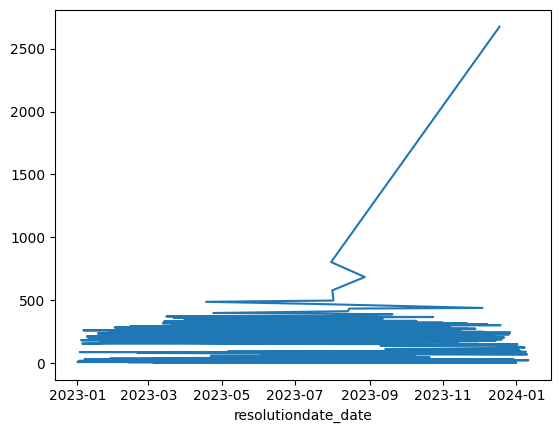

In [17]:
requests_23[
    requests_23.organizationacronym == "DDOT"
].resolutiondate_date.value_counts().plot()